# Machine Learning Liver Disease Prediction

In [63]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [64]:
# Reading the dataset
liver_df = pd.read_csv('../Data/indian_liver_patient.csv')
# Printing the first 5 rows of the dataframe.
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [65]:
# information about the dataset
liver_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [66]:
liver_df.dtypes[liver_df.dtypes=='object']

Gender    object
dtype: object

In [67]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

liver_df['Dataset'] = liver_df['Dataset'].map(partition)

In [68]:
liver_df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


In [69]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

liver_df['Gender'] = liver_df['Gender'].map(partition)

In [70]:
liver_df = liver_df.drop_duplicates()
print( liver_df.shape )

(570, 11)


In [71]:
liver_df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [72]:
liver_df = liver_df[liver_df.Aspartate_Aminotransferase <=3000 ]
liver_df.shape

(569, 11)

In [73]:
liver_df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
199    1050
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [74]:
liver_df = liver_df[liver_df.Aspartate_Aminotransferase <=2500 ]
liver_df.shape

(568, 11)

In [75]:
liver_df.isnull().values.any()

np.True_

In [76]:
liver_df=liver_df.dropna(how='any')  

In [77]:
liver_df.shape

(564, 11)

In [78]:
# Create separate object for target variable
y = liver_df.Dataset

# Create separate object for input features
x = liver_df.drop('Dataset', axis=1)

In [79]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

- Models :

- Model 1 : Logistic Regression
- Model 2 : KNearestNeighbors
- Model 3 : SVM
- Model 4 : Decision Tree
- Model 5 : Random Forest
- Model 6 : Gradient Boosting
- Model 7 : XGBoost

-  This approach will help us to keep the predictions much more accurate.
- In the below code we will be training all the seven models on the train data, checking the quality of our models using a accuracy.


In [80]:
accuracies={}
from sklearn.metrics import accuracy_score

# Model 1 : Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred1 = lr.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['LR']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 76.14213197969542 %
Testing accuracy score of the model is: 61.1764705882353 %


# Model 2 : KNearestNeighbors

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred2 = knn.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['KNN']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 82.99492385786802 %
Testing accuracy score of the model is: 60.588235294117645 %


# Model 3 : SVM

In [83]:
from sklearn.svm import SVC

svc = SVC(C = 10, gamma = 0.01, probability=True)
svc.fit(x_train, y_train)

y_pred3 = svc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['SVM']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 99.74619289340102 %
Testing accuracy score of the model is: 62.94117647058823 %


# Model 4 : Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, min_samples_leaf= 4, min_samples_split= 6, splitter= 'random')
dtc.fit(x_train, y_train)

y_pred4 = dtc.predict(x_test)

acc4=accuracy_score(y_test,y_pred4)
accuracies['DT']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 85.78680203045685 %
Testing accuracy score of the model is: 67.64705882352942 %


# Model 5 : Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 5, 
                                min_samples_split = 2, n_estimators = 400)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF'] = acc5 * 100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 91.87817258883248 %
Testing accuracy score of the model is: 64.11764705882354 %


# Model 6 : Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'log_loss', n_estimators = 400)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 67.05882352941175 %


# Model 7 : XGBoost

In [87]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 400)

xgb.fit(x_train, y_train)
y_pred7 = xgb.predict(x_test)

acc7=accuracy_score(y_test,y_pred7)

accuracies['XGBoost']=acc7*100
print("Training accuracy score of the model is:",accuracy_score(y_train, xgb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred7)*100,"%")

Training accuracy score of the model is: 93.1472081218274 %
Testing accuracy score of the model is: 64.70588235294117 %


In [88]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XgBoost'],
    'Score': [acc1, acc2, acc3, acc4, acc5, acc6, acc7]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Decision Tree,0.676471
5,Gradient Boosting,0.670588
6,XgBoost,0.647059
4,Random Forest,0.641176
2,SVM,0.629412
0,Logistic Regression,0.611765
1,KNN,0.605882


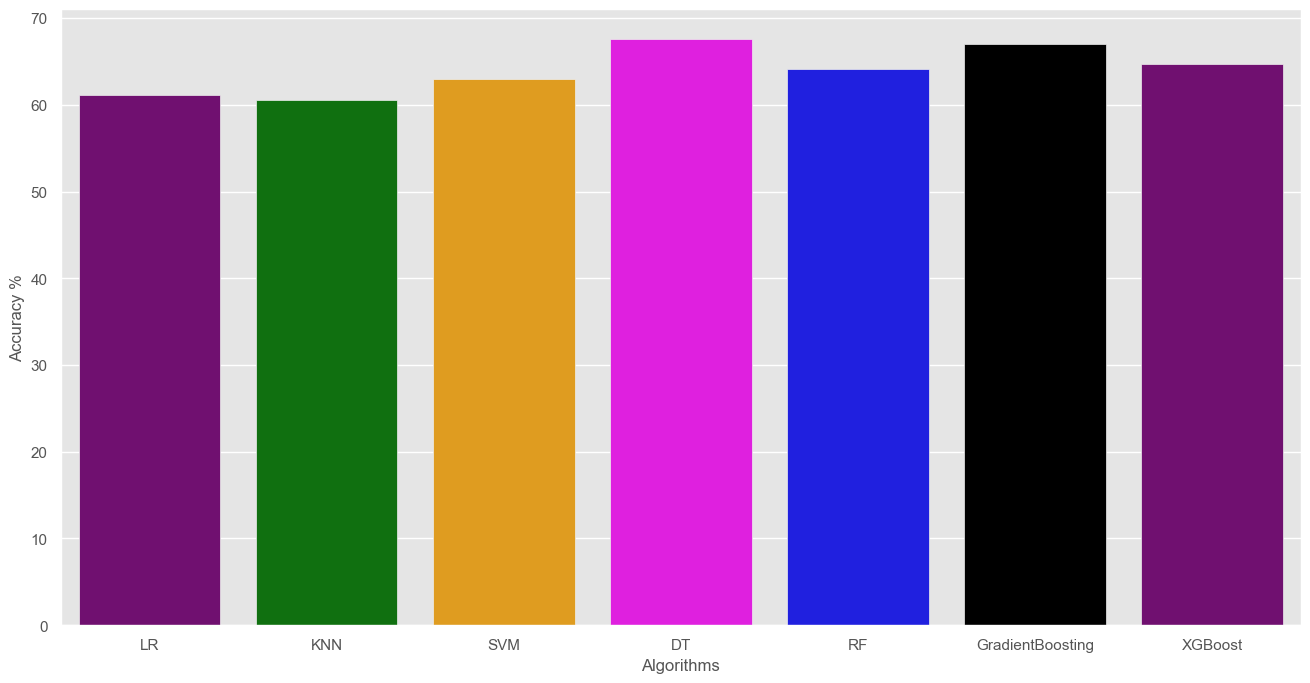

In [89]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

- Model 5 :  Random Forest has the highest accuracy

In [94]:
import pickle
model = dtc
pickle.dump(model, open("../Models/liver.pkl",'wb'))

In [95]:
type(model)

sklearn.tree._classes.DecisionTreeClassifier

In [96]:
import numpy as np

healthy_input = np.array([[30, 1, 0.8, 0.2, 85, 22, 18, 7.5, 4.0, 1.2]])  
healthy_input = healthy_input.reshape(1, -1)

prediction = model.predict(healthy_input)
print("Liver Disease Diagnosis:", "Diseased" if prediction[0] == 1 else "Healthy")


Liver Disease Diagnosis: Healthy


In [97]:
liver_disease_input = np.array([[55, 0, 5.8, 2.5, 210, 80, 75, 5.0, 2.8, 0.7]])  
liver_disease_input = liver_disease_input.reshape(1, -1)

prediction = model.predict(liver_disease_input)
print("Liver Disease Diagnosis:", "Diseased" if prediction[0] == 1 else "Healthy")


Liver Disease Diagnosis: Diseased
